In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
## The below lines are used to dispay all the columns and rows of the dataframe( without this the rows and columns would come 
# in truncated format)

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)


In [3]:
#Importing the data
df=pd.read_csv("MoviesOnStreamingPlatforms_updated.csv")
df.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87%,1.0,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,1.0,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1.0,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,1.0,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1.0,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [4]:
df.shape

(16744, 16)

In [ ]:
Data Exploration

In [5]:
df.isnull().sum()

ID                     0
Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            726
Genres               275
Country              435
Language             599
Runtime              592
dtype: int64

In [6]:
# Removing Null Values
df.dropna(how='any',axis=0,inplace=True)
df.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87%,1.0,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,1.0,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1.0,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,1.0,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1.0,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [7]:
df.shape

(3301, 16)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3301 entries, 0 to 16705
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               3301 non-null   int64  
 1   Title            3301 non-null   object 
 2   Year             3301 non-null   int64  
 3   Age              3301 non-null   object 
 4   IMDb             3301 non-null   float64
 5   Rotten Tomatoes  3301 non-null   object 
 6   Netflix          3301 non-null   float64
 7   Hulu             3301 non-null   int64  
 8   Prime Video      3301 non-null   int64  
 9   Disney+          3301 non-null   int64  
 10  Type             3301 non-null   int64  
 11  Directors        3301 non-null   object 
 12  Genres           3301 non-null   object 
 13  Country          3301 non-null   object 
 14  Language         3301 non-null   object 
 15  Runtime          3301 non-null   float64
dtypes: float64(3), int64(6), object(7)
memory usage: 438.4+ KB


In [9]:
df.isnull().sum()

ID                 0
Title              0
Year               0
Age                0
IMDb               0
Rotten Tomatoes    0
Netflix            0
Hulu               0
Prime Video        0
Disney+            0
Type               0
Directors          0
Genres             0
Country            0
Language           0
Runtime            0
dtype: int64

In [10]:
#Removing duplicates
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.nunique()

ID                 3301
Title              3301
Year                 87
Age                   5
IMDb                 64
Rotten Tomatoes      99
Netflix               3
Hulu                  2
Prime Video           2
Disney+               2
Type                  1
Directors          2555
Genres              800
Country             510
Language            438
Runtime             145
dtype: int64

In [13]:
#Summary of the data
df.describe()

,ID,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
count,3301.000000,3301.000000,3301.000000,3301.000000,3301.000000,3301.000000,3301.000000,3301.0,3301.000000
mean,5240.267798,2006.134808,6.350530,0.302942,0.129658,0.545895,0.101181,0.0,102.710391
std,4479.389204,14.599201,0.992021,0.459603,0.335977,0.497965,0.301615,0.0,19.551805
min,1.000000,1902.000000,1.600000,0.000000,0.000000,0.000000,0.000000,0.0,11.000000
25%,1299.000000,2002.000000,5.700000,0.000000,0.000000,0.000000,0.000000,0.0,91.000000
50%,4782.000000,2011.000000,6.400000,0.000000,0.000000,1.000000,0.000000,0.0,100.000000
75%,6520.000000,2016.000000,7.100000,1.000000,0.000000,1.000000,0.000000,0.0,111.000000
max,16706.000000,2020.000000,9.000000,1.010000,1.000000,1.000000,1.000000,0.0,260.000000


Grouping the data

In [13]:
# Counting Number of movies on each platform
noofmovies=df["Netflix"].value_counts(),df["Hulu"].value_counts(),df["Prime Video"].value_counts(),df["Disney+"].value_counts()
noofmovies


(0.00    2301
 1.00     999
 1.01       1
 Name: Netflix, dtype: int64,
 0    2873
 1     428
 Name: Hulu, dtype: int64,
 1    1802
 0    1499
 Name: Prime Video, dtype: int64,
 0    2967
 1     334
 Name: Disney+, dtype: int64)

In [ ]:
#0 means=not present,1=present
#Observation:
#So,Prime Video has more videos followed by Netflix,Hulu and Disney+

In [14]:
# Movie wise distribution across each OTT platform
Moviewise=df.groupby(['Title'])['Netflix','Hulu','Prime Video','Disney+'].max()
Moviewise.head()
#0 means the movie is not present in that platform and 1 means the movie is present in  that platform

,Netflix,Hulu,Prime Video,Disney+
Title,,,,
02:22,0.0,1,0,0
1 Night,0.0,0,1,0
10 Rillington Place,0.0,0,1,0
100 Bloody Acres,0.0,0,1,0
101 Dalmatians,0.0,0,0,1


In [15]:
#Average IMDb rating of each movie across the country
Average=df.groupby(['Title','Country'])['IMDb'].mean()
Average.head(10)


Title                                        Country                     
02:22                                        United States                   5.8
1 Night                                      United States                   5.8
10 Rillington Place                          United Kingdom                  7.6
100 Bloody Acres                             Australia                       6.0
101 Dalmatians                               United States,United Kingdom    5.7
101 Dalmatians II: Patch's London Adventure  United States                   5.8
102 Dalmatians                               United States,United Kingdom    4.9
102 Not Out                                  India                           7.4
10x10                                        United Kingdom                  5.0
11:55                                        United States                   4.9
Name: IMDb, dtype: float64

In [16]:
## Agewise distribution of movies across each OTT platform
agewise=df.groupby(['Age','Title'])['Netflix','Hulu','Prime Video','Disney+'].max()
agewise.head()



Netflix  Hulu  Prime Video  Disney+
Age Title                                                          
13+ 02:22                           0.0     1            0        0
    1 Night                         0.0     0            1        0
    1492: Conquest of Paradise      0.0     0            1        0
    20 Feet from Stardom            1.0     0            0        0
    2012                            1.0     0            0        0

In [17]:
## Directorwise distribution of movies across each OTT platform

Directorswise=df.groupby(['Directors','Title'])['Netflix','Hulu','Prime Video','Disney+'].max()
Directorswise.head(10)

Netflix  Hulu  \
Directors                  Title                                           
A.J. Eaton                 David Crosby: Remember My Name      0.0     1   
Aamir Khan,Amole Gupte     Like Stars on Earth                 1.0     0   
Aaron Blaise,Robert Walker Brother Bear                        0.0     0   
Aaron J. Wiederspahn       The Sensation of Sight              0.0     0   
Aaron Lieber               Bethany Hamilton: Unstoppable       1.0     0   
Aaron Mirtes               Clowntergeist                       0.0     0   
Aaron Sorkin               Molly's Game                        1.0     0   
Aaron Woodley              Arctic Dogs                         1.0     0   
                           Spark: A Space Tail                 0.0     0   
Aaron Woolf                King Corn                           0.0     0   

                                                           Prime Video  \
Directors                  Title                                         
A.J. Eaton                 David Crosby: Remember My Name            0   
Aamir Khan,Amole Gupte     Like Stars on Earth                       0   
Aaron Blaise,Robert Walker Brother Bear                              0   
Aaron J. Wiederspahn       The Sensation of Sight                    1   
Aaron Lieber               Bethany Hamilton: Unstoppable             0   
Aaron Mirtes               Clowntergeist                             1   
Aaron Sorkin               Molly's Game                              0   
Aaron Woodley              Arctic Dogs                               0   
                           Spark: A Space Tail                       1   
Aaron Woolf                King Corn                                 1   

                                                           Disney+  
Directors                  Title                                    
A.J. Eaton                 David Crosby: Remember My Name        0  
Aamir Khan,Amole Gupte     Like Stars on Earth                   0  
Aaron Blaise,Robert Walker Brother Bear                          1  
Aaron J. Wiederspahn       The Sensation of Sight                0  
Aaron Lieber               Bethany Hamilton: Unstoppable         0  
Aaron Mirtes               Clowntergeist                         0  
Aaron Sorkin               Molly's Game                          0  
Aaron Woodley              Arctic Dogs                           0  
                           Spark: A Space Tail                   0  
Aaron Woolf                King Corn                             0

In [18]:
## Yearwise distribution of movies across each OTT platform
Yearwise=df.groupby(['Year','Title'])['Netflix','Hulu','Prime Video','Disney+'].max()
Yearwise.head()

,,Netflix,Hulu,Prime Video,Disney+
Year,Title,,,,
1902,A Trip to the Moon,0.0,0,1,0
1915,The Birth of a Nation,0.0,0,1,0
1920,The Cabinet of Dr. Caligari,0.0,0,1,0
1922,Robin Hood,0.0,0,1,1
1925,The Phantom of the Opera,0.0,0,1,0


In [19]:
## Genrewise distribution of movies across each OTT platform
Genrewise=df.groupby(['Genres','Title'])['Netflix','Hulu','Prime Video','Disney+'].max()
Genrewise.head(10)

Netflix  \
Genres           Title                                                         
Action           All the Devil's Men                                     1.0   
                 Blood Hunters                                           0.0   
                 I Am Vengeance                                          1.0   
                 Rowdy Rathore                                           1.0   
Action,Adventure Batman Begins                                           0.0   
                 Flying Swords of Dragon Gate                            0.0   
                 Indiana Jones and the Kingdom of the Crystal Skull      1.0   
                 Indiana Jones and the Last Crusade                      1.0   
                 Indiana Jones and the Temple of Doom                    1.0   
                 Raiders of the Lost Ark                                 1.0   

                                                                     Hulu  \
Genres           Title                                                      
Action           All the Devil's Men                                    0   
                 Blood Hunters                                          0   
                 I Am Vengeance                                         0   
                 Rowdy Rathore                                          0   
Action,Adventure Batman Begins                                          1   
                 Flying Swords of Dragon Gate                           0   
                 Indiana Jones and the Kingdom of the Crystal Skull     0   
                 Indiana Jones and the Last Crusade                     0   
                 Indiana Jones and the Temple of Doom                   0   
                 Raiders of the Lost Ark                                0   

                                                                     Prime Video  \
Genres           Title                                                             
Action           All the Devil's Men                                           0   
                 Blood Hunters                                                 1   
                 I Am Vengeance                                                1   
                 Rowdy Rathore                                                 0   
Action,Adventure Batman Begins                                                 0   
                 Flying Swords of Dragon Gate                                  1   
                 Indiana Jones and the Kingdom of the Crystal Skull            0   
                 Indiana Jones and the Last Crusade                            0   
                 Indiana Jones and the Temple of Doom                          0   
                 Raiders of the Lost Ark                                       0   

                                                                     Disney+  
Genres           Title                                                        
Action           All the Devil's Men                                       0  
                 Blood Hunters                                             0  
                 I Am Vengeance                                            0  
                 Rowdy Rathore                                             0  
Action,Adventure Batman Begins                                             0  
                 Flying Swords of Dragon Gate                              0  
                 Indiana Jones and the Kingdom of the Crystal Skull        0  
                 Indiana Jones and the Last Crusade                        0  
                 Indiana Jones and the Temple of Doom                      0  
                 Raiders of the Lost Ark                                   0

In [20]:
#Genrewise , number of movies sponsored by each platform
df.groupby(['Genres'])['Netflix'].max().value_counts(),df['Hulu'].value_counts(),df['Prime Video'].value_counts(),df['Disney+'].value_counts().unique()

(0.00    436
 1.00    363
 1.01      1
 Name: Netflix, dtype: int64,
 0    2873
 1     428
 Name: Hulu, dtype: int64,
 1    1802
 0    1499
 Name: Prime Video, dtype: int64,
 array([2967,  334]))

In [21]:
#Directorwise, number of movies sponsored by each platform
df.groupby(['Directors'])['Netflix'].max().value_counts(),df['Hulu'].value_counts(),df['Prime Video'].value_counts(),df['Disney+'].value_counts().unique()

(0.00    1705
 1.00     849
 1.01       1
 Name: Netflix, dtype: int64,
 0    2873
 1     428
 Name: Hulu, dtype: int64,
 1    1802
 0    1499
 Name: Prime Video, dtype: int64,
 array([2967,  334]))

Data Visualization

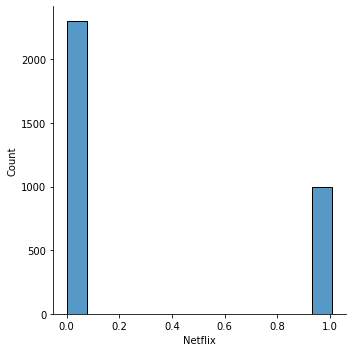

In [22]:
sns.displot(df['Netflix'])

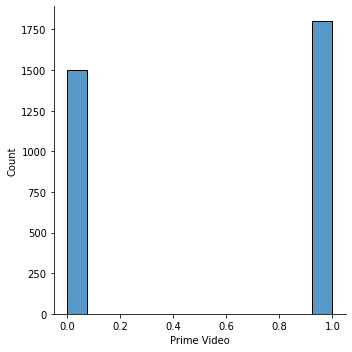

In [23]:
sns.displot(df['Prime Video'])

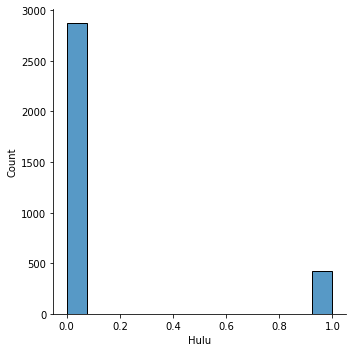

In [24]:
sns.displot(df['Hulu'])

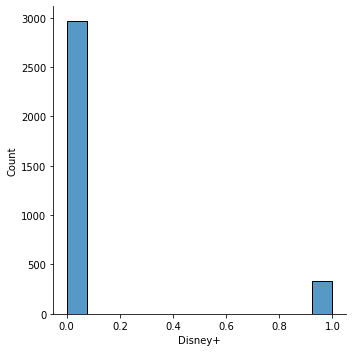

In [25]:
sns.displot(df['Disney+'])

In [26]:
#Observations:
#From the above charts it is clear that Prime Video has more movies and Disney+ has least number of movies

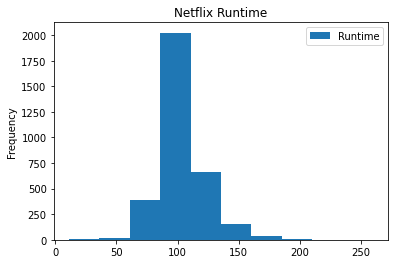

In [30]:
from matplotlib import pyplot as plt 
df.plot( x='Netflix', y='Runtime', kind='hist')
plt.title("Netflix Runtime")
plt.show()

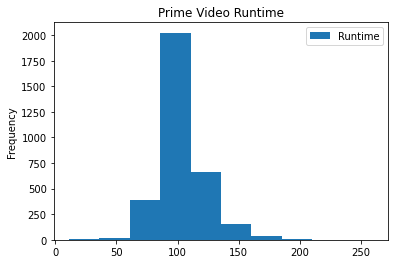

In [31]:
df.plot( x='Prime Video', y='Runtime', kind='hist')
plt.title("Prime Video Runtime")
plt.show()

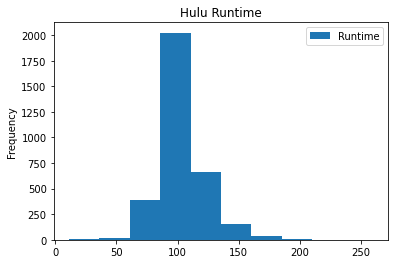

In [32]:
df.plot( x='Hulu', y='Runtime', kind='hist')
plt.title("Hulu Runtime")
plt.show()

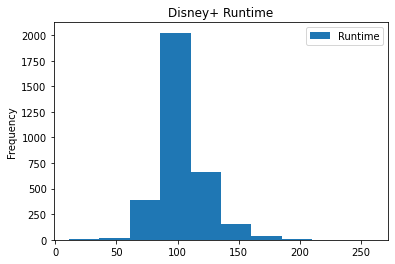

In [33]:
df.plot( x='Disney+', y='Runtime', kind='hist')
plt.title("Disney+ Runtime")
plt.show()

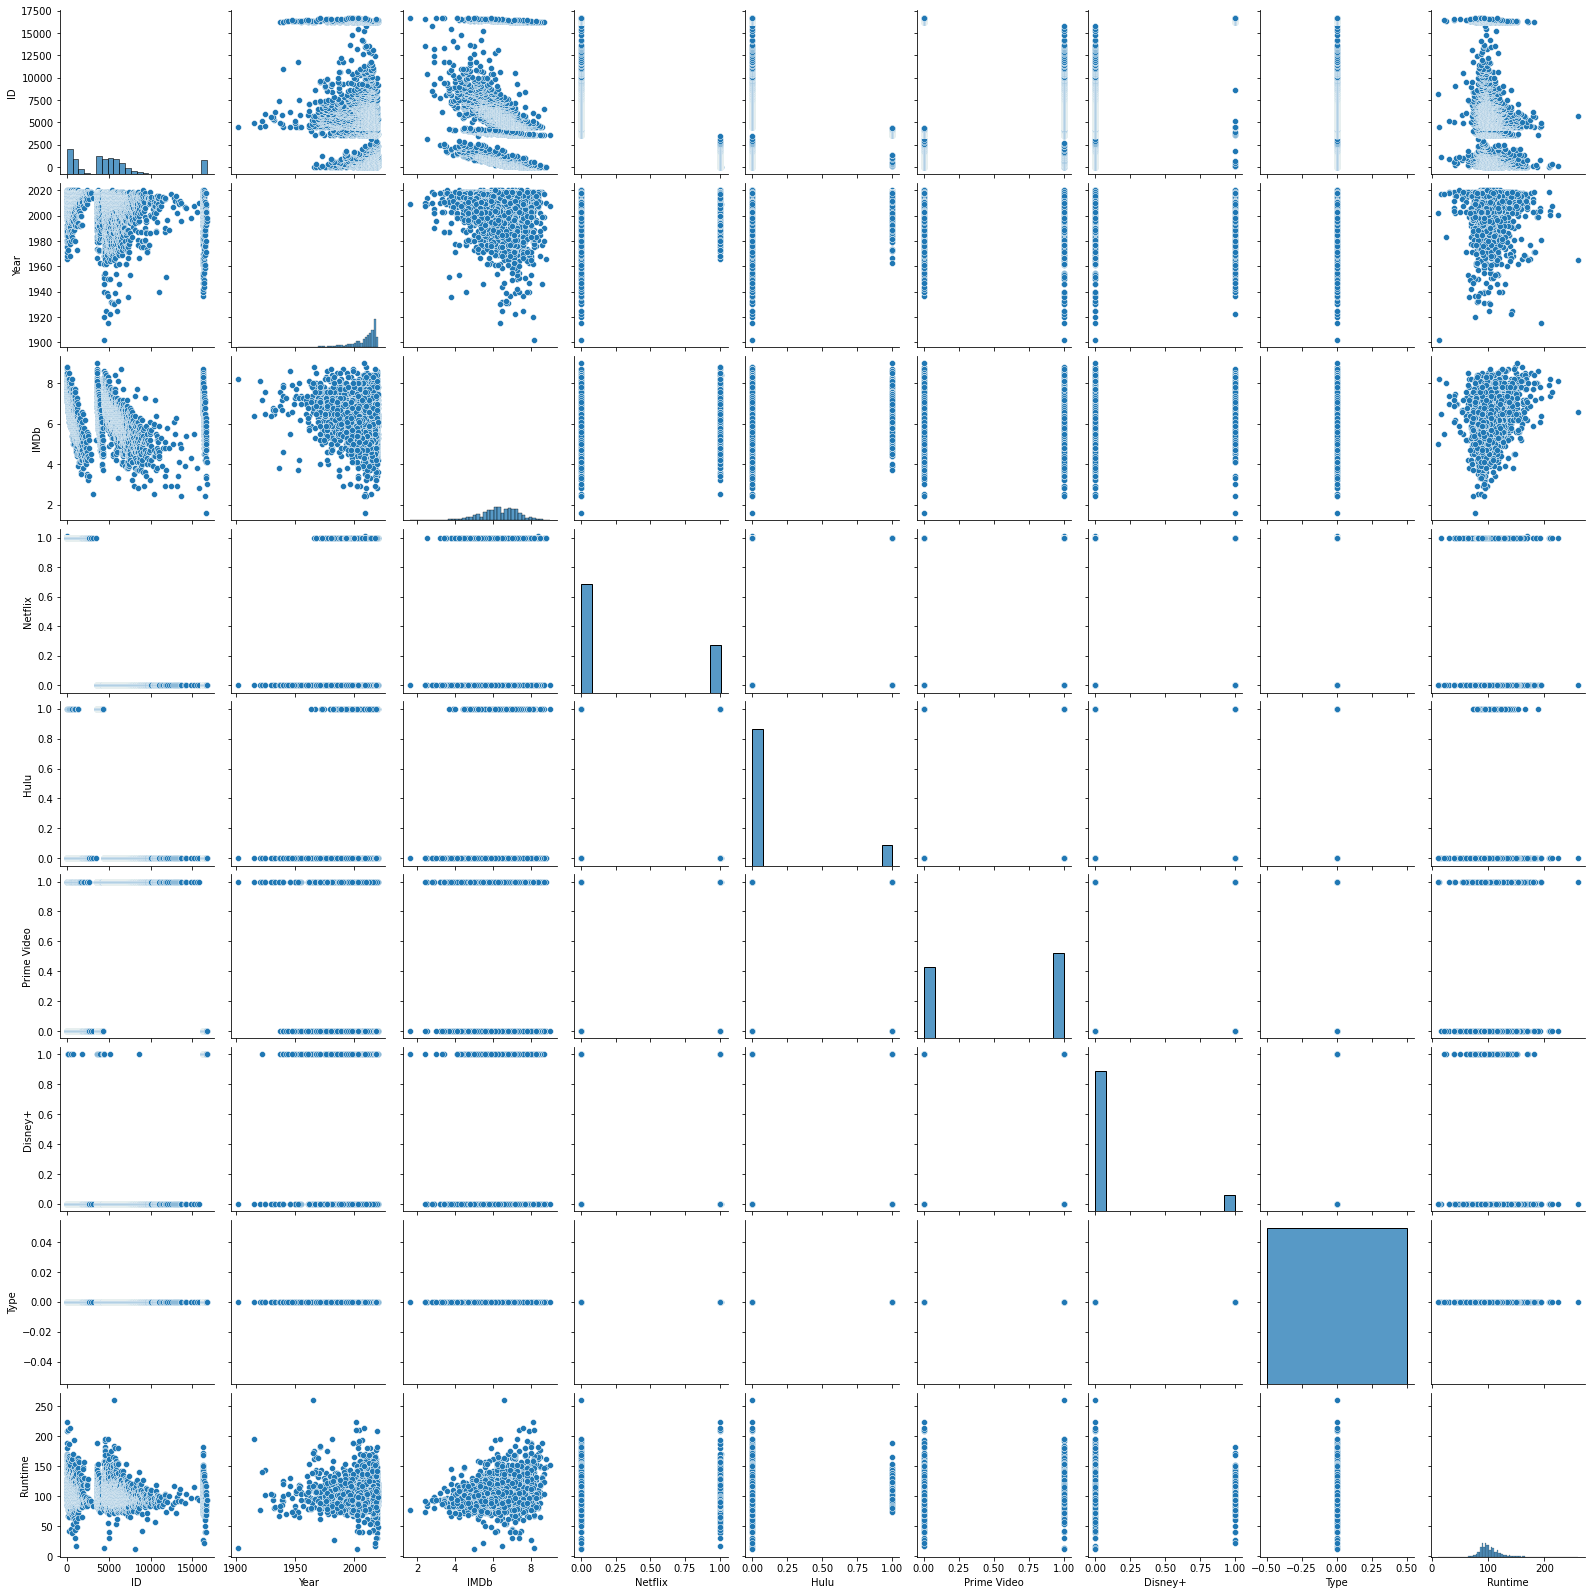

In [29]:
sns.pairplot(df)

Data Modelling

In [16]:
#Coping the data to another dataframe

inp1=df.copy(deep=True)
inp1.head()


,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87%,1.0,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,1.0,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1.0,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,1.0,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1.0,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [17]:
inp1.dropna(how="any",axis=0,inplace=True)
inp1.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87%,1.0,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,1.0,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1.0,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,1.0,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1.0,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [18]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3301 entries, 0 to 16705
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               3301 non-null   int64  
 1   Title            3301 non-null   object 
 2   Year             3301 non-null   int64  
 3   Age              3301 non-null   object 
 4   IMDb             3301 non-null   float64
 5   Rotten Tomatoes  3301 non-null   object 
 6   Netflix          3301 non-null   float64
 7   Hulu             3301 non-null   int64  
 8   Prime Video      3301 non-null   int64  
 9   Disney+          3301 non-null   int64  
 10  Type             3301 non-null   int64  
 11  Directors        3301 non-null   object 
 12  Genres           3301 non-null   object 
 13  Country          3301 non-null   object 
 14  Language         3301 non-null   object 
 15  Runtime          3301 non-null   float64
dtypes: float64(3), int64(6), object(7)
memory usage: 438.4+ KB


In [19]:
# Getting the dummies for significant character variables

inp2= pd.concat([ pd.get_dummies(inp1['Age']), pd.get_dummies(inp1['Genres']), inp1.iloc[:,[2,4,6,7,8,9,15]]], axis = 1)
inp2.head()

,13+,16+,18+,7+,all,Action,"Action,Adventure","Action,Adventure,Biography,Drama,History","Action,Adventure,Biography,Drama,Romance","Action,Adventure,Comedy","Action,Adventure,Comedy,Crime","Action,Adventure,Comedy,Crime,Drama,Thriller","Action,Adventure,Comedy,Crime,Family,Mystery","Action,Adventure,Comedy,Crime,Family,Romance,Sport","Action,Adventure,Comedy,Crime,Thriller","Action,Adventure,Comedy,Drama,Family","Action,Adventure,Comedy,Drama,Family,Fantasy","Action,Adventure,Comedy,Drama,Family,War","Action,Adventure,Comedy,Family,Fantasy","Action,Adventure,Comedy,Family,Fantasy,Sci-Fi","Action,Adventure,Comedy,Family,Musical,Romance","Action,Adventure,Comedy,Family,Romance","Action,Adventure,Comedy,Family,Sci-Fi","Action,Adventure,Comedy,Family,Western","Action,Adventure,Comedy,Fantasy","Action,Adventure,Comedy,Fantasy,Horror,Mystery,Thriller","Action,Adventure,Comedy,Fantasy,Horror,Sci-Fi,Thriller","Action,Adventure,Comedy,Fantasy,Mystery","Action,Adventure,Comedy,Fantasy,Sci-Fi","Action,Adventure,Comedy,Horror,Sci-Fi","Action,Adventure,Comedy,Horror,Sci-Fi,Thriller","Action,Adventure,Comedy,Musical,Mystery","Action,Adventure,Comedy,Mystery","Action,Adventure,Comedy,Romance","Action,Adventure,Comedy,Romance,Thriller,Western","Action,Adventure,Comedy,Sci-Fi","Action,Adventure,Comedy,Sci-Fi,Thriller","Action,Adventure,Comedy,Western","Action,Adventure,Crime,Drama,Fantasy,Horror,Mystery,Thriller","Action,Adventure,Crime,Drama,Horror,Mystery,Thriller","Action,Adventure,Crime,Drama,Mystery,Thriller","Action,Adventure,Crime,Drama,Romance","Action,Adventure,Crime,Drama,Thriller","Action,Adventure,Crime,Drama,Thriller,War","Action,Adventure,Crime,Fantasy,Mystery,Sci-Fi,Thriller","Action,Adventure,Crime,Mystery,Romance,Thriller","Action,Adventure,Crime,Mystery,Thriller","Action,Adventure,Crime,Thriller","Action,Adventure,Drama","Action,Adventure,Drama,Family","Action,Adventure,Drama,Family,Fantasy","Action,Adventure,Drama,Fantasy","Action,Adventure,Drama,Fantasy,Romance","Action,Adventure,Drama,History","Action,Adventure,Drama,History,Thriller","Action,Adventure,Drama,History,War","Action,Adventure,Drama,Horror,Sci-Fi,Thriller","Action,Adventure,Drama,Horror,Thriller","Action,Adventure,Drama,Mystery,Sci-Fi,Thriller","Action,Adventure,Drama,Mystery,Thriller","Action,Adventure,Drama,Romance,Thriller","Action,Adventure,Drama,Romance,Thriller,Western","Action,Adventure,Drama,Romance,War","Action,Adventure,Drama,Romance,Western","Action,Adventure,Drama,Sci-Fi","Action,Adventure,Drama,Thriller","Action,Adventure,Drama,Thriller,War","Action,Adventure,Family,Fantasy","Action,Adventure,Family,Fantasy,Romance","Action,Adventure,Family,Fantasy,Sci-Fi","Action,Adventure,Family,Fantasy,Sci-Fi,Thriller","Action,Adventure,Family,Fantasy,Thriller","Action,Adventure,Family,Mystery,Thriller","Action,Adventure,Family,Sci-Fi","Action,Adventure,Family,Sci-Fi,Thriller","Action,Adventure,Fantasy","Action,Adventure,Fantasy,Horror","Action,Adventure,Fantasy,Horror,Sci-Fi,Thriller","Action,Adventure,Fantasy,Sci-Fi","Action,Adventure,Fantasy,Sci-Fi,Thriller","Action,Adventure,Fantasy,Thriller","Action,Adventure,Horror,Mystery,Sci-Fi,Thriller","Action,Adventure,Horror,Sci-Fi","Action,Adventure,Horror,Sci-Fi,Thriller","Action,Adventure,Mystery,Sci-Fi,Thriller","Action,Adventure,Sci-Fi","Action,Adventure,Sci-Fi,Thriller","Action,Adventure,Thriller","Action,Adventure,Thriller,Western","Action,Biography,Crime,Drama","Action,Biography,Crime,Drama,Thriller","Action,Biography,Drama","Action,Biography,Drama,History","Action,Biography,Drama,History,Romance,Thriller,War","Action,Biography,Drama,History,War","Action,Biography,Drama,Romance,War","Action,Biography,Drama,Sport","Action,Biography,Drama,War","Action,Biography,History,War","Action,Biography,Western","Action,Comedy","Action,Comedy,Crime","Action,Comedy,Crime,Drama","Action,Comedy,Crime,Drama,Horror,Thriller","Action,Comedy,Crime,Drama,Mystery,Thriller","Action,Comedy,Crime,Drama,Thriller","Action,Comedy,Crime,

In [20]:
inp2.shape

(3301, 812)

In [21]:
features = inp2.iloc[:,0:812].values
features

array([[  1.,   0.,   0., ...,   0.,   0., 148.],
       [  0.,   0.,   1., ...,   0.,   0., 136.],
       [  1.,   0.,   0., ...,   0.,   0., 149.],
       ...,
       [  0.,   0.,   0., ...,   0.,   1., 116.],
       [  0.,   0.,   0., ...,   0.,   1.,  93.],
       [  0.,   0.,   0., ...,   0.,   1.,  93.]])

In [22]:
label = inp2.iloc[:,806].values
label

array([8.8, 8.7, 8.5, ..., 4.7, 3. , 4.1])

In [23]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(features,
                                                 label,
                                                 test_size=0.3,
                                                 random_state=20)


In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [25]:
model.fit(X_train,y_train)

LinearRegression()

In [26]:
model.intercept_

1.4352963262354024e-12

In [27]:
model.coef_

array([-1.12808898e-15, -2.76167977e-15, -6.45317133e-16, -2.35922393e-15,
        2.10942375e-15, -2.22044605e-15,  2.72004641e-15, -6.50868248e-15,
       -5.94142791e-16,  1.75554016e-15, -3.33066907e-16,  8.92948909e-16,
       -2.30154437e-15, -3.92914867e-16, -2.03613168e-15,  1.96045437e-15,
        3.93782229e-16,  3.78169718e-16, -6.66133815e-16,  1.71737624e-16,
        4.48252546e-15, -1.43982049e-16, -1.19262239e-15, -3.03576608e-17,
        1.77028531e-15, -1.31795616e-15,  1.27784068e-15, -8.66494376e-16,
        5.14518983e-15,  9.08127740e-16,  2.48855569e-15, -8.15320034e-17,
       -1.19262239e-15, -7.71735106e-16, -8.73541690e-16,  1.47429811e-15,
       -5.64598281e-16, -3.17356818e-15, -7.93663095e-16, -1.73472348e-17,
       -2.83952549e-16, -1.25496401e-16, -1.36034847e-15, -1.66387086e-15,
        6.93889390e-18, -1.76621955e-15,  5.97883288e-16, -1.08723794e-15,
       -6.15284733e-16,  2.60772307e-15,  6.23307829e-16, -9.55182114e-16,
       -8.67361738e-19, -

In [28]:
#Results

testAccuracy = model.score(X_test,y_test)
trainAccuracy = model.score(X_train,y_train)

print("Test Score is {} and train Score is {}".format(testAccuracy,trainAccuracy))

Test Score is 1.0 and train Score is 1.0


In [49]:
#Conclusion

# As observed above, testScore = trainScore , thus the model is a generalized model!!!
# SL = 0.05
# CL = 0.95
# 2. Ensure the Model's accuracy score must be greater than or equal to CL score (*CL = 1 - SL)
#
# Technique : Accuracy(Test Data) >= CL

#Since my testScore is greater than  CL, model passed the Quality Check !
#Hence the model is a good model to analyse the data